<a href="https://colab.research.google.com/github/frankssenoga/frankssenoga/blob/main/NEW_ML_ASSIGNMENT_3_NEW_LATEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Lab Assignment: Predictive Modeling for Insurance Claims**

**Name: SSENOGA FRANK** <br>
**Reg_No: 2023/HD05/0476U** <br>
**Student No:2300704746** <br>
Course code name: Machine learning <br>








Build a predictive model to determine if a building will have an insurance claim during a specific
period using building characteristics. In this assignment, you will explore and apply four
machine learning algorithms: Support Vector Machine (SVM), Linear Regression, k-nearest
Neighbors (KNN), and Naive Bayes. The evaluation metric for this assignment is the Area Under
the Curve (AUC)

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


**Importing libraries**

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import VimeoVideo
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from google.colab import files
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# **Loading dataset 1**





In [7]:
df_r=pd.read_csv('/content/drive/MyDrive/ML DATASETS/train_data.csv')

In [8]:
df_r.shape

(7160, 14)

In [9]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


### **calculating some basic statistics on the data**

In [10]:
df_r.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


### **identifying missing values**

In [11]:
df_r.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [12]:
df_r.isnull().sum().sum()

723

### **Filling missing values/imputting dataset 1**

In [13]:
# filling in missing values for categorical values of Garden and Geo_Code
# Mode is the number that occurs very mnay times in the list of values
df_r['Garden'].fillna(df_r['Garden'].mode()[0],inplace=True)
df_r['Geo_Code'].fillna(df_r['Geo_Code'].mode()[0],inplace=True)

In [14]:
 # filling in missing values for Building Dimension and Building Dimension

df_r['Building Dimension'] = df_r['Building Dimension'].fillna(df_r['Building Dimension'].median())
df_r['Date_of_Occupancy'] = df_r['Date_of_Occupancy'].fillna(df_r['Date_of_Occupancy'].median())

In [15]:
# Replacing a '.' in the Number Of Windows variable with 'None'
df_r['NumberOfWindows'].replace(('   .'), 'None', inplace=True)

In [16]:
# Removing outliers in the Building Dimension variable
#mask_dim = df["Building Dimension"].between(lower, higher)
#df=df[mask_dim]

In [17]:
 #Removing outliers in the Date Of Occupancy variable
#low, high = df["Date_of_Occupancy"].quantile([0.1, 0.9])
#mask_date = df["Date_of_Occupancy"].between(low, high)
#df = df[mask_date]

In [18]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [19]:
df_r.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,None,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,None,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,None,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [20]:
dfc=df_r

In [21]:
dfc.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [22]:
dfc.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,None,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,None,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,None,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


## **Loading dataset 2**

In [23]:
# loading the secod dataset
ds2=pd.read_csv('/content/drive/MyDrive/ML DATASETS/test_data.csv')

In [24]:
# identifying the total number of rows and columns of dataset 2
ds2.shape

(3069, 13)

In [25]:
ds2.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [26]:
# viewing the structure of the dataset 2
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [27]:
# performing the basic statistics on dataset 2
ds2.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
count,3069.000000,3069.000000,3069.000000,3056.000000,3069.000000,2341.000000
mean,2013.593679,0.922806,0.224177,1666.790576,2.359400,1966.781717
std,1.372138,0.219066,0.417107,2251.180599,0.998464,25.238702
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1750.000000
25%,2012.000000,1.000000,0.000000,470.000000,2.000000,1960.000000
50%,2013.000000,1.000000,0.000000,900.000000,2.000000,1968.000000
75%,2015.000000,1.000000,0.000000,1957.000000,3.000000,1980.000000
max,2016.000000,1.000000,1.000000,30745.000000,4.000000,2012.000000


In [28]:
# viewing missing vlaues from dataset 2
ds2.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [29]:
# determining the total number of missing vlaues from the second dataset
ds2.isnull().sum().sum()

758

In [30]:
# Removing / imputting missing values from dataset 2

In [31]:
# filling in missing values for categorical values of Garden and Geo_Code
# Mode is the number that occurs very mnay times in the list of values
ds2['Garden'].fillna(ds2['Garden'].mode()[0],inplace=True)
ds2['Geo_Code'].fillna(ds2['Geo_Code'].mode()[0],inplace=True)

In [32]:
# filling in missing values for Numerical variables of Building Dimension and Date of Occupancy
# We are going to use median (the middle number in the sorted list) instead of mean because
# median is a good choice if we have a lot of outliers in that variable
ds2['Building Dimension'] = ds2['Building Dimension'].fillna(df_r['Building Dimension'].median())
ds2['Date_of_Occupancy'] = ds2['Date_of_Occupancy'].fillna(df_r['Date_of_Occupancy'].median())

In [33]:
# Replacing a '.' in the Number Of Windows variable with 'None' from the second dataset
ds2['NumberOfWindows'].replace(('   .'), 'None', inplace=True)

In [34]:
# Removing outliers from the dataset 2 using the building dimension variable using the Z- score method
upper_limit2 = ds2['Building Dimension'].mean() + 0.7*ds2['Building Dimension'].std()
lower_limit2 = ds2['Building Dimension'].mean() - 0.7*ds2['Building Dimension'].std()

In [35]:
print('Upper_limit2:',upper_limit2)
print('Lower_limit2:',lower_limit2)

Upper_limit2: 3237.025983600388
Lower_limit2: 91.60940251886882


In [36]:
# lets find the outliers from that column
ds2.loc[(ds2['Building Dimension']>upper_limit2) | (ds2['Building Dimension']<lower_limit2)]
ds2.loc[(ds2['Building Dimension']<upper_limit2) | (ds2['Building Dimension']>lower_limit2)]

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,None,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,H11583,2015,1.000000,0,V,V,V,U,1083.0,4,1900.0,None,6083
3065,H11720,2012,1.000000,0,V,V,V,U,1083.0,2,1948.0,None,6083
3066,H11721,2012,1.000000,0,V,V,V,U,1083.0,2,1993.0,None,6083
3067,H12408,2013,1.000000,0,V,V,V,U,1083.0,1,1800.0,None,6083


In [37]:
ds22=ds2.loc[(ds2['Building Dimension']<upper_limit2) & (ds2['Building Dimension']>lower_limit2)]


Text(0, 0.5, 'Frequency')

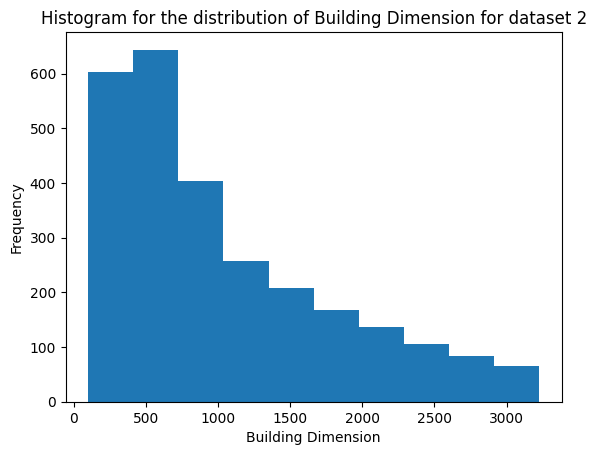

In [38]:
plt.hist(ds22['Building Dimension'])
plt.title('Histogram for the distribution of Building Dimension for dataset 2')
plt.xlabel('Building Dimension')
plt.ylabel('Frequency')

In [39]:
# we have removed outliers from Buidling dimension variable of dataset 2
ds22['Building Dimension'].describe()

count    2677.000000
mean     1040.450131
std       759.358922
min       100.000000
25%       450.000000
50%       790.000000
75%      1500.000000
max      3225.000000
Name: Building Dimension, dtype: float64

In [40]:
# using the Z score method to deal with outliers in  the Date_of_Occupancy variable
upper_limit2 = ds22['Date_of_Occupancy'].mean() + 3*ds22['Date_of_Occupancy'].std()
lower_limit2 = ds22['Date_of_Occupancy'].mean() - 3*ds22['Date_of_Occupancy'].std()

In [41]:
print('Upper_limit2:',upper_limit2)
print('Lower_limit2:',lower_limit2)

Upper_limit2: 2034.649715711534
Lower_limit2: 1898.331980216744


In [42]:
# lets find the outliers from that column
ds22.loc[(ds22['Date_of_Occupancy']>upper_limit2) | (ds22['Date_of_Occupancy']<lower_limit2)]

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
35,H8315,2015,1.000000,0,V,N,O,R,190.0,4,1850.0,4,6004
127,H8532,2012,1.000000,0,V,N,O,R,420.0,4,1890.0,5,6029
304,H8302,2012,1.000000,0,V,N,O,R,1894.0,4,1856.0,5,6088
493,H1136,2016,1.000000,0,V,N,O,R,575.0,2,1890.0,4,13001
575,H10343,2012,1.000000,0,V,N,O,R,560.0,2,1850.0,3,13201
619,H10565,2014,1.000000,0,V,N,O,R,390.0,2,1850.0,5,13202
620,H10566,2015,1.000000,0,V,N,O,R,390.0,2,1850.0,5,13202
1038,H11716,2013,1.000000,0,V,N,O,R,600.0,2,1850.0,3,26108
1141,H7844,2015,0.578082,1,V,N,O,R,2218.0,2,1820.0,3,31538
1184,H10813,2015,1.000000,1,V,N,O,R,806.0,3,1870.0,5,33063


In [43]:
ds2_new =  ds22.loc[(ds22['Date_of_Occupancy']<upper_limit2) & (ds22['Date_of_Occupancy']>lower_limit2)]
print('old dataframe:',len(ds22))
print('new dataframe:',len(ds2_new))
print('outliers:',len(ds22)-len(ds2_new))

old dataframe: 2677
new dataframe: 2641
outliers: 36


Text(0, 0.5, 'Frequency')

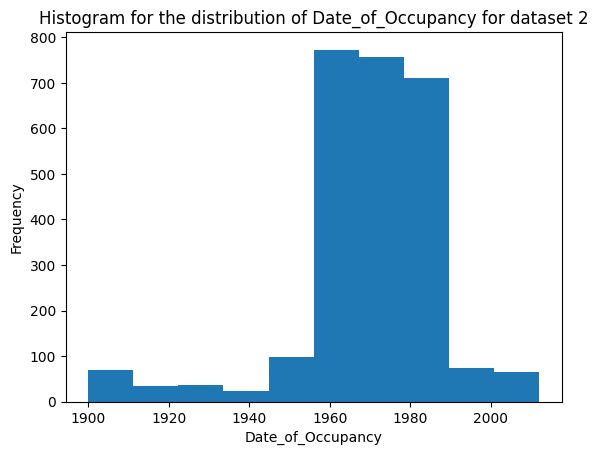

In [44]:
plt.hist(ds2_new['Date_of_Occupancy'])
plt.title('Histogram for the distribution of Date_of_Occupancy for dataset 2')
plt.xlabel('Date_of_Occupancy')
plt.ylabel('Frequency')

In [45]:
# this is the new dataset 2 with outliers removed from it
ds2_new.shape

(2641, 13)

In [46]:
ds2_new.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,None,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [47]:
# viewing the normalised structure of dataset 2
ds2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2641 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         2641 non-null   object 
 1   YearOfObservation   2641 non-null   int64  
 2   Insured_Period      2641 non-null   float64
 3   Residential         2641 non-null   int64  
 4   Building_Painted    2641 non-null   object 
 5   Building_Fenced     2641 non-null   object 
 6   Garden              2641 non-null   object 
 7   Settlement          2641 non-null   object 
 8   Building Dimension  2641 non-null   float64
 9   Building_Type       2641 non-null   int64  
 10  Date_of_Occupancy   2641 non-null   float64
 11  NumberOfWindows     2641 non-null   object 
 12  Geo_Code            2641 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 288.9+ KB


In [48]:
# checking to see if there are missing values in the new normalised dataset 2
ds2_new.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

# **Data analysis of dataset 1**

In [49]:
# distribution of the target variable
dfc["Claim"].unique()
dfc["Claim"].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

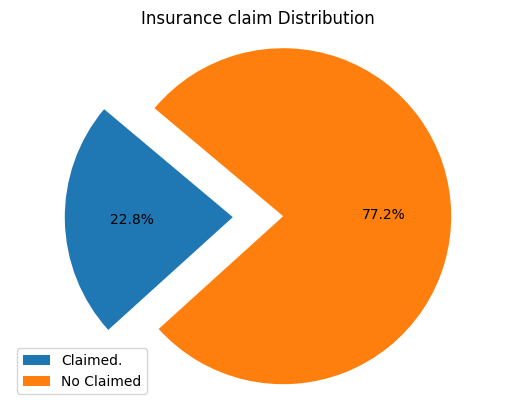

In [50]:
# Sample data (replace with your actual data)
labels = ['Claimed.', 'No Claimed']
values = [dfc["Claim"].sum(), len(dfc) - dfc["Claim"].sum()]
# Create a pie chart with labeled segments
plt.pie(values, autopct='%1.1f%%', startangle=140,explode=[0.3,0])
plt.title("Insurance claim Distribution")

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.legend(labels=labels, loc='lower left')
plt.show()

From the pie-chart a bove we can observe that 77.2% of customers didnot issue an insurance claim whereas 22.8% issued an isurance claim

**Exploring other variables**

### **distribution of categorical variables**

In [51]:
dfc.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [52]:
Categ_var=['Building_Painted','Building_Fenced','Garden','Settlement','NumberOfWindows']

In [53]:
list(enumerate(Categ_var))

[(0, 'Building_Painted'),
 (1, 'Building_Fenced'),
 (2, 'Garden'),
 (3, 'Settlement'),
 (4, 'NumberOfWindows')]

<Figure size 640x480 with 0 Axes>

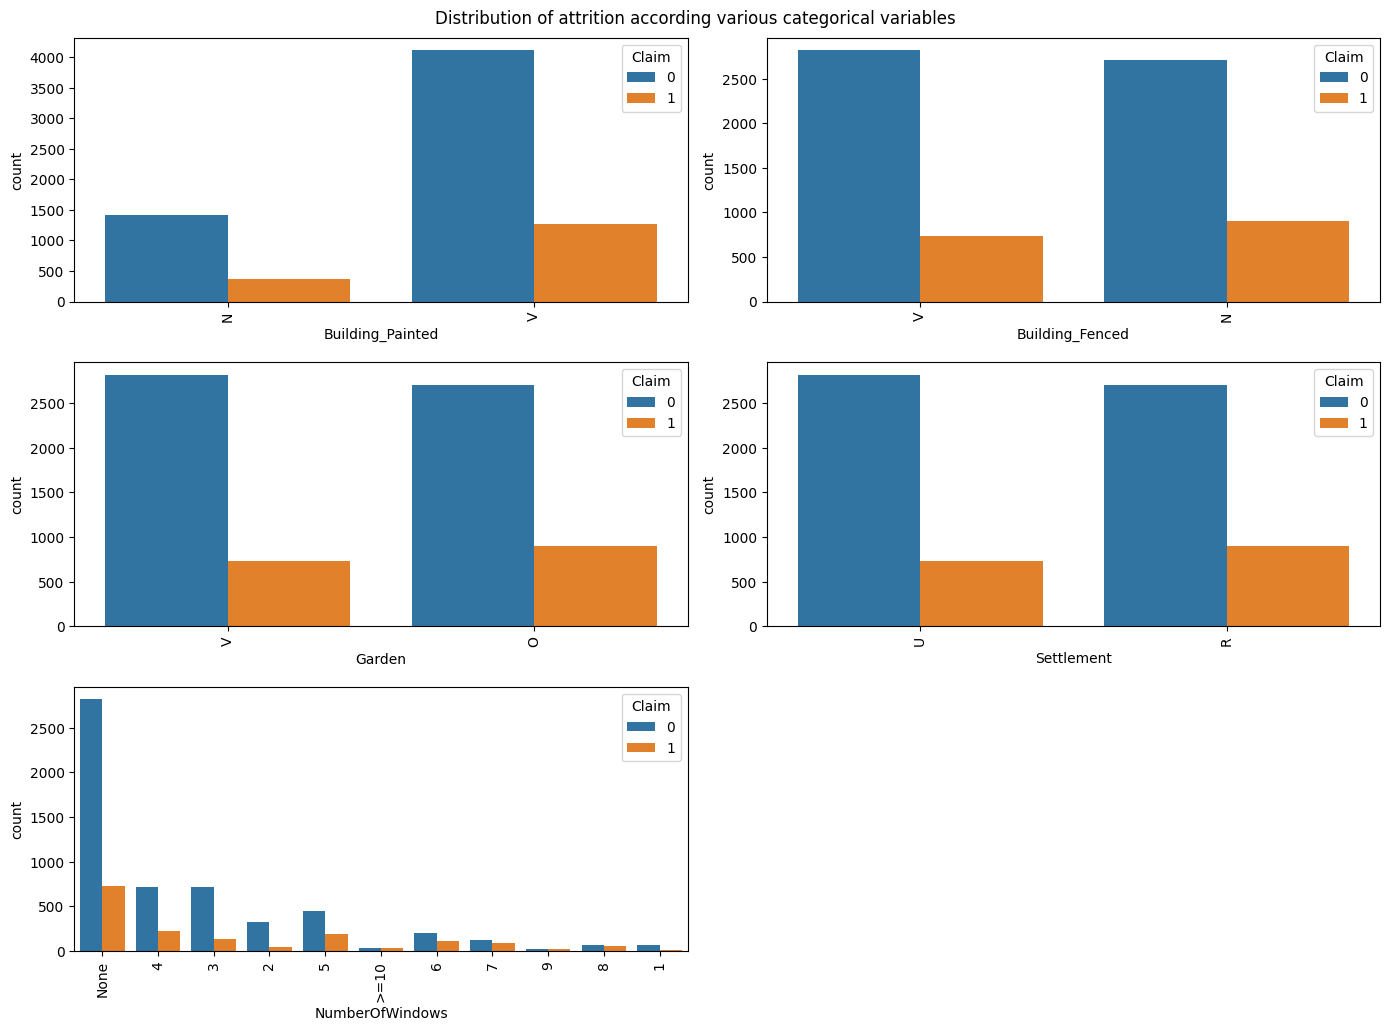

In [54]:
plt.suptitle("Distribution of attrition according various categorical variables")
plt.figure(figsize=(14,10))
for i in enumerate(Categ_var):
 plt.subplot(3,2,i[0]+1)
 plt.tight_layout()
 plt.suptitle("Distribution of attrition according various categorical variables")
 sns.countplot(x=i[1], hue ='Claim', data = dfc)
 plt.xticks(rotation = 90)

# **Observations**


1.   The non painted buildings have a higher insurance claim campared to
     the painted houses for the first bar graph
2.   The non fensed buildings have a higher insurance claim campared to the
     fensed houses
1.   The buildings without gardens a higher insurance claim campared to
     those buildings with gardens
2.   Buildings in the Urban Settlement have a low insurance claim  as     compared to those in rural setting





.



In [55]:
dfc.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

**dealing with outliers**

In [56]:
def plot_variable(df,variable):
  plt.figure(figsize = (16,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(df[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of Building Dimension')
  plt.xlabel('Building Dimension')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.title('A boxplot for the distribution of Building Dimension')
  plt.xlabel('Building Dimension')
  plt.ylabel('Frequency')
  plt.show()




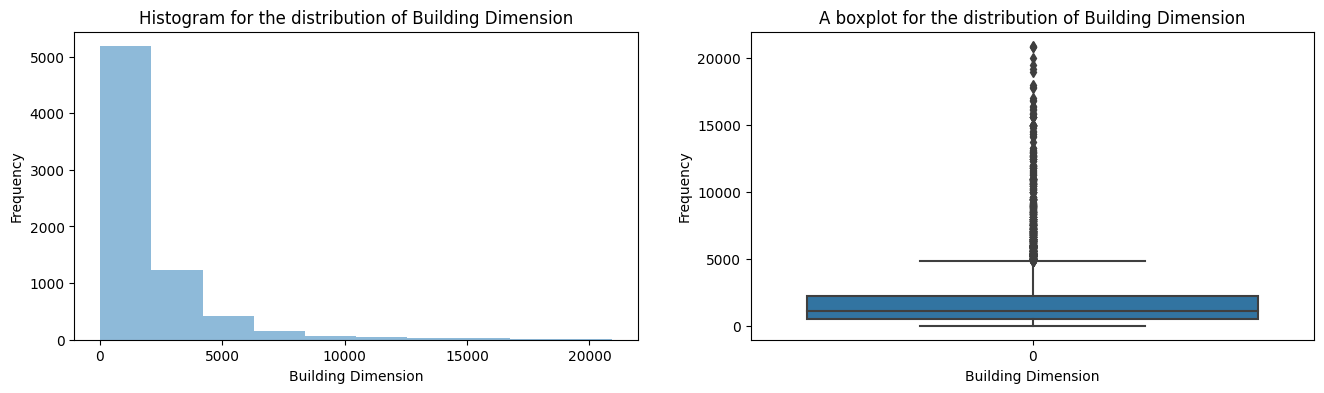

In [57]:
# visualizing outliers in Building dimension variable
plot_variable(dfc,'Building Dimension')

In [58]:
# using the Z score method to hanlde outlier in the Building Dimension variable
upper_limit = dfc['Building Dimension'].mean() + 0.8*dfc['Building Dimension'].std()
lower_limit = dfc['Building Dimension'].mean() - 0.8*dfc['Building Dimension'].std()

In [59]:
print('Upper_limit:',upper_limit)
print('Lower_limit:',lower_limit)

Upper_limit: 3682.510133045266
Lower_limit: 61.23623566981814


In [60]:
# lets find the outliers from that column
dfc.loc[(dfc['Building Dimension']>upper_limit) | (dfc['Building Dimension']<lower_limit)]

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7,H14488,2015,1.000000,0,N,V,V,U,4952.0,1,1988.0,None,1160,0
16,H14330,2014,1.000000,0,N,V,V,U,3990.0,1,1988.0,None,1419,1
17,H14331,2015,1.000000,0,N,V,V,U,3990.0,1,1988.0,None,1419,0
25,H15578,2012,1.000000,0,V,N,O,R,5439.0,1,1976.0,>=10,3190,0
26,H15579,2014,1.000000,0,V,N,O,R,5439.0,1,1976.0,>=10,3190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,H15596,2015,1.000000,0,V,N,O,R,4207.0,3,2009.0,4,2B033,0
7043,H18281,2012,0.836066,0,V,N,O,R,5300.0,3,1982.0,5,2B033,1
7044,H18282,2014,1.000000,0,V,N,O,R,5300.0,3,1982.0,5,2B033,1
7045,H18283,2015,1.000000,0,V,N,O,R,5300.0,3,1982.0,5,2B033,0


In [61]:
# we r going to trim the outliers from the Building Dimension variable
df_r_new = dfc.loc[(df_r['Building Dimension']<upper_limit) & (dfc['Building Dimension']>lower_limit)]
print('old dataframe:',len(dfc))
print('new dataframe:',len(df_r_new))
print('outliers:',len(dfc)-len(df_r_new))

old dataframe: 7160
new dataframe: 6173
outliers: 987


### **new visualisation of building dimension variable**

In [62]:
def plot_variable(df,variable):
  plt.figure(figsize = (16,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(df[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of Building Dimension')
  plt.xlabel('Building Dimension')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.title('A boxplot for the distribution of Building Dimension')
  plt.xlabel('Building Dimension')
  plt.ylabel('Frequency')
  plt.show()


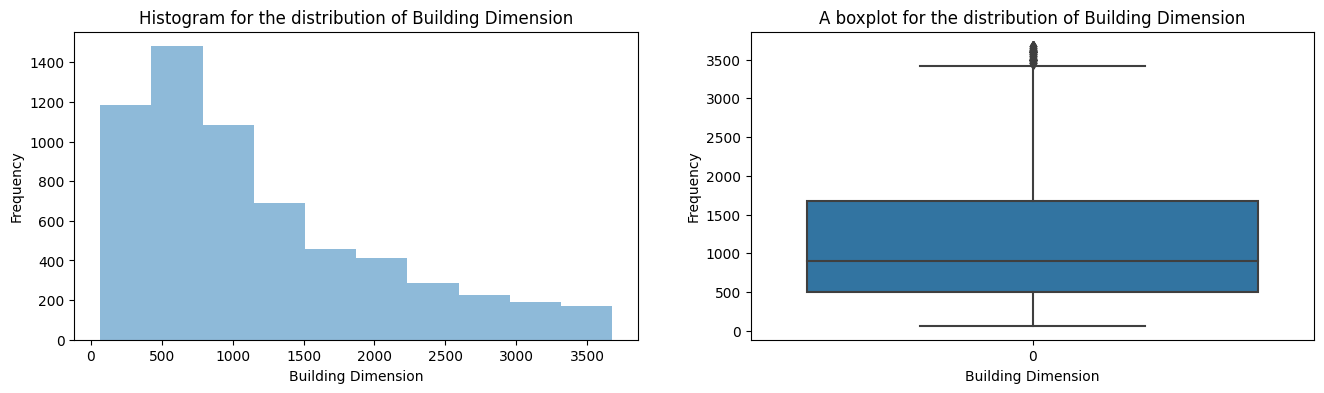

In [63]:
plot_variable(df_r_new,'Building Dimension')

In [64]:
# Visualisation of outliers in the date of occupancy variable
def plot_variable(df,variable):
  plt.figure(figsize = (16,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(df[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of date of occupancy')
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  plt.title('A boxplot for the distribution of date of occupancy')
  plt.show()

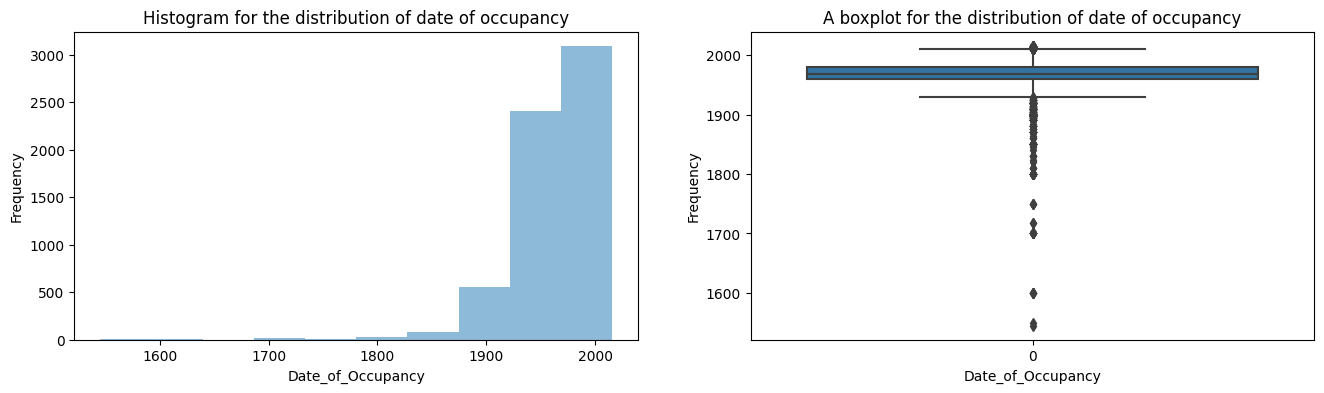

In [65]:
plot_variable(df_r_new,'Date_of_Occupancy')

In [66]:
# using the Z score method to deal with outliers in  the Date_of_Occupancy variable
upper_limit = df_r_new['Date_of_Occupancy'].mean() + 2.5*df_r_new['Date_of_Occupancy'].std()
lower_limit = df_r_new['Date_of_Occupancy'].mean() - 2.5*df_r_new['Date_of_Occupancy'].std()

In [67]:
print('Upper_limit:',upper_limit)
print('Lower_limit:',lower_limit)

Upper_limit: 2051.7363285612764
Lower_limit: 1873.3908381323893


In [68]:
# lets find the outliers from that column
df_r_new.loc[(df_r_new['Date_of_Occupancy']>upper_limit) | (df_r_new['Date_of_Occupancy']<lower_limit)]

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
12,H15676,2013,1.000000,0,V,N,O,R,842.0,1,1550.0,4,1305,0
21,H16563,2016,0.997268,0,V,N,O,R,2400.0,1,1700.0,3,2408,0
34,H16387,2012,1.000000,0,V,N,O,R,480.0,2,1800.0,4,4088,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7060,H13529,2015,0.947945,0,V,V,V,U,1083.0,2,1870.0,None,6088,1
7061,H13531,2014,1.000000,0,V,V,V,U,1083.0,2,1870.0,None,6088,0
7094,H16444,2015,0.660274,0,V,V,V,U,1083.0,2,1870.0,None,6088,0
7130,H18557,2014,1.000000,1,V,V,V,U,1083.0,1,1700.0,None,6088,0


In [69]:
# we r going to trim the outliers
dfn = df_r_new.loc[(df_r_new['Date_of_Occupancy']<upper_limit) & (df_r_new['Date_of_Occupancy']>lower_limit)]
print('old dataframe:',len(df_r_new))
print('new dataframe:',len(dfn))
print('outliers:',len(df_r_new)-len(dfn))

old dataframe: 6173
new dataframe: 6046
outliers: 127


In [70]:
def plot_variable(df,variable):
  plt.figure(figsize = (16,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(df[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of date of occupancy')
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  plt.title('A boxplot for the distribution of date of occupancy')
  plt.show()

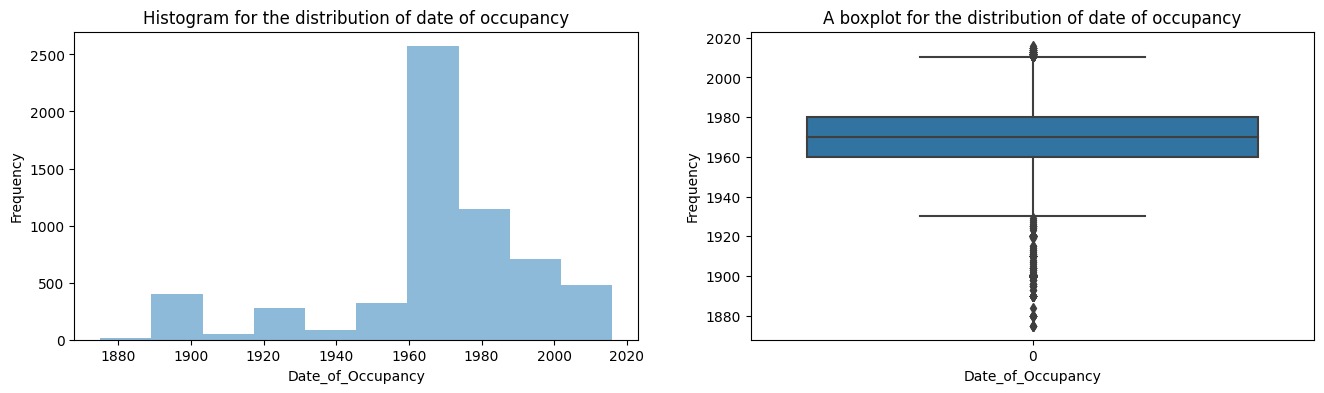

In [71]:
plot_variable(dfn,'Date_of_Occupancy')

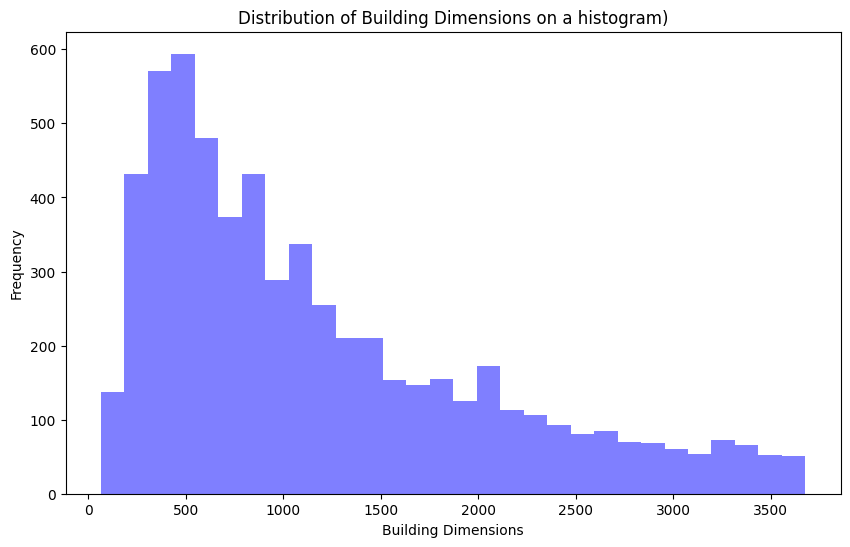

In [72]:
# A histogram showing the distribution of Building dimensions
plt.figure(figsize = (10,6))
plt.hist(dfn["Building Dimension"], bins=30, color='blue', alpha=0.5)
plt.xlabel("Building Dimensions")
plt.ylabel("Frequency")
plt.title("Distribution of Building Dimensions on a histogram)")
plt.show()

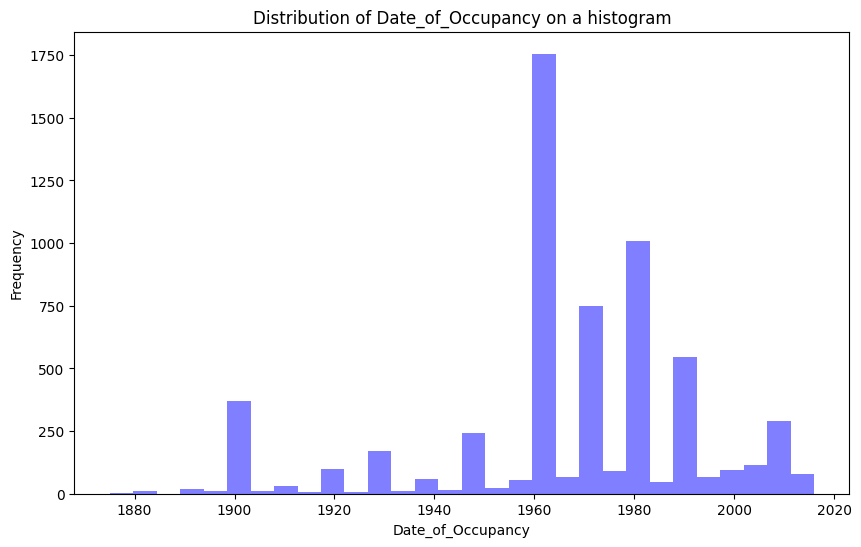

In [73]:
# A histogram showing the distribution of Date_of_Occupancy
plt.figure(figsize = (10,6))
plt.hist(dfn["Date_of_Occupancy"], bins=30, color='blue', alpha=0.5)
plt.xlabel("Date_of_Occupancy")
plt.ylabel("Frequency")
plt.title("Distribution of Date_of_Occupancy on a histogram")
plt.show()

In [74]:
dfn["Date_of_Occupancy"].unique()

array([1960., 1980., 1988., 2013., 2011., 1900., 2007., 1970., 1950.,
       1940., 1920., 1982., 1972., 2010., 1971., 1995., 2006., 1999.,
       1985., 1965., 1981., 1975., 1997., 2003., 1990., 1930., 1973.,
       1991., 1974., 1967., 1927., 1957., 1978., 2009., 1890., 1949.,
       1951., 2008., 2000., 1962., 1956., 1983., 1954., 1968., 2004.,
       1936., 1979., 1946., 1955., 2001., 1976., 1961., 2015., 1964.,
       1984., 1958., 2014., 2002., 1986., 1993., 1992., 1977., 2005.,
       2012., 1910., 1945., 1942., 1939., 1934., 1998., 1908., 1926.,
       1987., 1938., 1895., 1959., 1966., 1989., 1996., 1963., 1948.,
       1875., 1898., 1880., 1952., 1969., 1915., 1953., 1994., 1937.,
       1907., 1931., 1925., 1935., 1914., 1903., 1905., 1906., 1923.,
       1924., 1928., 1947., 2016., 1911., 1912., 1901., 1902., 1904.,
       1919., 1896., 1913., 1893., 1884., 1929.])

In [75]:
dfn.shape

(6046, 14)

In [76]:
# checking for duplicate values
dfn.duplicated().sum()

0

**Distribution of insurance claim with respect to numerical variables**

In [77]:
dfn.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [78]:
figure10=['Residential','Building Dimension','Building_Type','Date_of_Occupancy',]

In [79]:
list(enumerate(figure10))

[(0, 'Residential'),
 (1, 'Building Dimension'),
 (2, 'Building_Type'),
 (3, 'Date_of_Occupancy')]

In [80]:
dfn["Residential"].unique()

array([0, 1])

<Figure size 640x480 with 0 Axes>

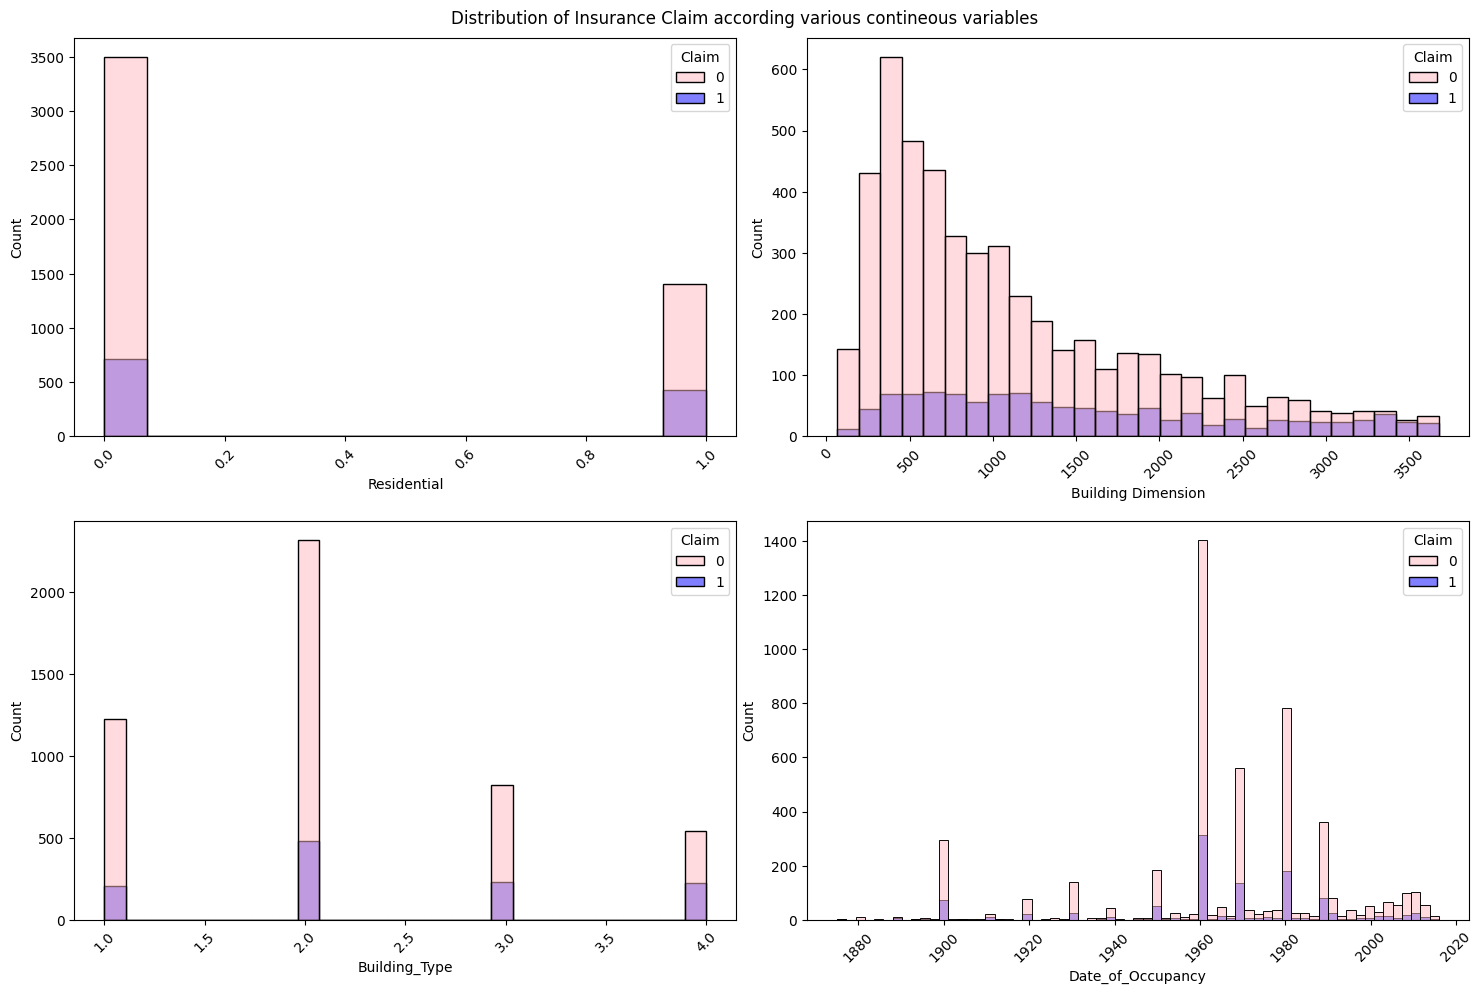

In [81]:
# visualisation of contineuous/ numerical variables on a histogram
plt.suptitle("Distribution of Insurance Claim according various contineous variables")
plt.figure(figsize=(15,10))
for i in enumerate(figure10):
  plt.subplot(2,2,i[0]+1)
  plt.suptitle("Distribution of Insurance Claim according various contineous variables")
  plt.tight_layout()
  sns.histplot(x=i[1], hue ='Claim', data = dfn, palette=['lightpink','blue'])
  plt.xticks(rotation = 45)

In [82]:
dfn['Building Dimension'].describe()

count    6046.000000
mean     1186.672842
std       867.276913
min        65.000000
25%       500.000000
50%       909.500000
75%      1700.000000
max      3678.000000
Name: Building Dimension, dtype: float64

### **Observations**
There was a high insurance claim in the year 1960 according to Date of occupancy bar graph.

Buildings of dimensions between 500 to 2000 have a higher insurance claim

Non residential buildings have a higer insurance claim claim as compared to the residential buildings

Buildings with type number 2 have a hot a higher insurance claim as opposed to other number types

### **Data encoding using label encoder for catogorical variables of the original dataset**

In [83]:
dfn['NumberOfWindows'].values

array(['None', 'None', 'None', ..., 'None', 'None', 'None'], dtype=object)

In [84]:

dfn['Building_Painted'].values


array(['N', 'N', 'V', ..., 'V', 'V', 'V'], dtype=object)

In [85]:
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ["Building_Painted", "Building_Fenced", "Garden", "Settlement","NumberOfWindows",]
for column in categorical_columns:
    dfn[column] = label_encoder.fit_transform(dfn[column])
    print(dfn)

     Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H14663               2013        1.000000            0   
2          H3802               2014        1.000000            0   
3          H3834               2013        1.000000            0   
5          H4977               2012        1.000000            0   
6          H7390               2012        1.000000            0   
...          ...                ...             ...          ...   
7155       H5290               2012        1.000000            1   
7156       H5926               2013        1.000000            0   
7157       H6204               2016        0.038251            0   
7158       H6537               2013        1.000000            0   
7159       H7470               2014        1.000000            0   

      Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                    0               V      V          U               290.0   
2                    0 

In [86]:
# lets see the encoded dataset for the dataset 1
dfn.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,0,1,1,1,290.0,1,1960.0,10,1053,0
2,H3802,2014,1.0,0,0,1,1,1,595.0,1,1960.0,10,1053,0
3,H3834,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,10,1053,0
5,H4977,2012,1.0,0,1,0,0,0,535.0,1,1980.0,2,1143,0
6,H7390,2012,1.0,0,0,1,1,1,2830.0,1,1988.0,10,1143,0


In [87]:
# lets see the encoded dataset for the dataset 2
ds2_new.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,None,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [88]:
# Data encoding using label encoder for catogorical variables for dataset 2
# Create a LabelEncoder
label_encoder = LabelEncoder()
# Encode categorical columns
categorical_columns = ["Building_Painted", "Building_Fenced", "Garden", "Settlement","NumberOfWindows",]
for column in categorical_columns:
    ds2_new[column] = label_encoder.fit_transform(ds2_new[column])
    print(ds2_new)

     Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H11920               2013        1.000000            0   
1         H11921               2016        0.997268            0   
2          H9805               2013        0.369863            0   
3          H7493               2014        1.000000            0   
4          H7494               2016        1.000000            0   
...          ...                ...             ...          ...   
3063      H11582               2012        1.000000            0   
3064      H11583               2015        1.000000            0   
3065      H11720               2012        1.000000            0   
3066      H11721               2012        1.000000            0   
3068       H9021               2012        1.000000            0   

      Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                    1               N      O          R               300.0   
1                    1 

## **Feature selection**

In [89]:
#Specification of independent and dependent variables of dataset 1
X = dfn.drop(columns=['Claim','Customer Id','Geo_Code'])  # Features
y = dfn['Claim']  # Target variable

In [90]:
# Calculate chi-squared statistics for each feature
from sklearn.feature_selection import chi2
chi2_scores = chi2(X, y)
chi2_scores


(array([3.69348439e-04, 2.68724291e+00, 2.34179053e+01, 1.18403697e-01,
        1.59236548e+00, 1.68725667e+00, 1.66565357e+00, 1.51673161e+05,
        3.31941116e+01, 6.46630650e-01, 3.49014701e+00]),
 array([9.84666847e-01, 1.01154706e-01, 1.30359512e-06, 7.30772299e-01,
        2.06988498e-01, 1.93962995e-01, 1.96841716e-01, 0.00000000e+00,
        8.34027097e-09, 4.21319892e-01, 6.17351025e-02]))

Text(0, 0.5, 'Feature Importance')

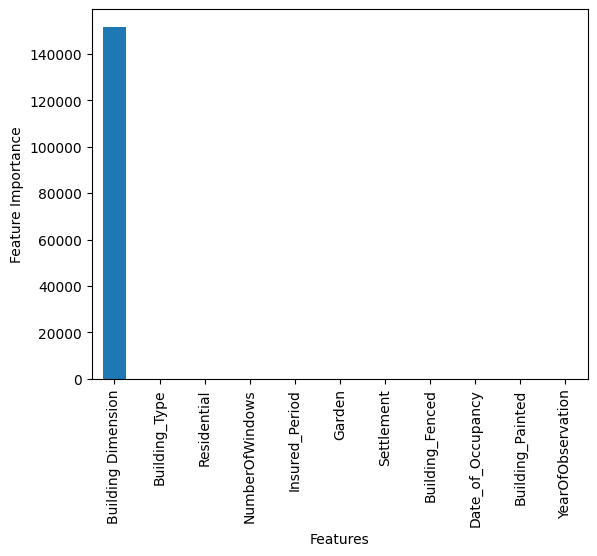

In [91]:
# plotting Chi_2 Scores on the bar graph
chi_values = pd.Series(chi2_scores[0],index = X.columns)
chi_values.sort_values(ascending=False, inplace= True)
chi_values.plot.bar()
plt.xlabel('Features')
plt.ylabel('Feature Importance')


Text(0, 0.5, 'p_scores')

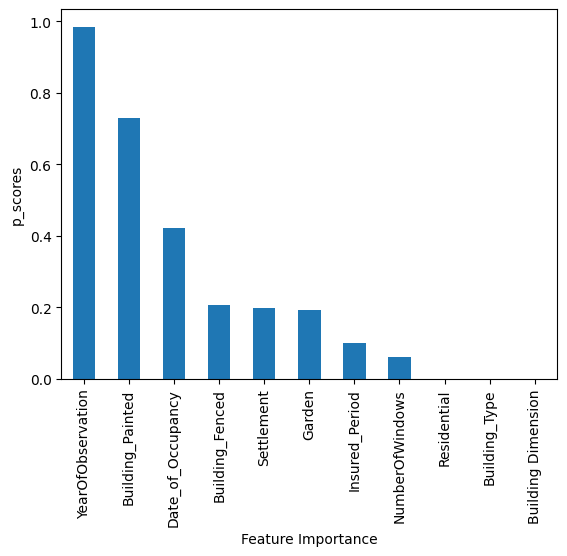

In [92]:
#Plotting using the p-values
p_values = pd.Series(chi2_scores[1],index = X.columns)
p_values.sort_values(ascending=False, inplace= True)
p_values.plot.bar()
plt.xlabel('Feature Importance')
plt.ylabel('p_scores')

I used chi-squared to apply feature selection techniques and identify the most relevant feature for insurance claim in the dataset
and from the graph we can see that Buiding type and Building dimension are the most important variables because they have a higher chi2 score and a lower p-values from the graphs above

In [93]:
chi_values

Building Dimension    151673.160958
Building_Type             33.194112
Residential               23.417905
NumberOfWindows            3.490147
Insured_Period             2.687243
Garden                     1.687257
Settlement                 1.665654
Building_Fenced            1.592365
Date_of_Occupancy          0.646631
Building_Painted           0.118404
YearOfObservation          0.000369
dtype: float64

**splitting the dataset into training and testing**

In [94]:
dfd=dfn.drop(columns=['Customer Id','NumberOfWindows','Building_Painted','YearOfObservation','Date_of_Occupancy','Geo_Code'])
dfn.drop(columns=['Customer Id','NumberOfWindows','Building_Painted','YearOfObservation','Date_of_Occupancy','Geo_Code'])

,Insured_Period,Residential,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Claim
0,1.000000,0,1,1,1,290.0,1,0
2,1.000000,0,1,1,1,595.0,1,0
3,1.000000,0,1,1,1,2840.0,1,0
5,1.000000,0,0,0,0,535.0,1,0
6,1.000000,0,1,1,1,2830.0,1,0
...,...,...,...,...,...,...,...,...
7155,1.000000,1,1,1,1,1083.0,1,0
7156,1.000000,0,1,1,1,1083.0,2,1
7157,0.038251,0,1,1,1,1083.0,1,0
7158,1.000000,0,1,1,1,1083.0,1,0


# **Specifying the X and Y variables for dataset 1**

In [95]:
# Independent variable
#Tx = dfd.drop(columns=['Claim'])
Tx = dfd.iloc[:, :-1].values
# dependent variable
#Ty = dfn['Claim']
Ty = dfn.iloc[:, -1].values

In [96]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
Tx_train, Tx_test, Ty_train, Ty_test = train_test_split(Tx, Ty, test_size= 0.20, random_state=0)

In [97]:
# structure of the x-train dataset
Tx_train.shape

(4836, 7)

In [98]:
# structure of the x-test dataset
Tx_test.shape

(1210, 7)

In [99]:
# structure of the y-train dataset
Ty_train.shape

(4836,)

In [100]:
# structure of the y-test dataset
Ty_test.shape

(1210,)

### **Scaling the data**

In [101]:
# scaling to optimse the performance matrix of the model
# The reason for scaling the data is to ensure that all the numerical variables
# are the scaled to the same unit.
# All these variables are in different units

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Tx_train = sc.fit_transform(Tx_train)
Tx_test = sc.transform(Tx_test)

In [103]:
Tx_train

array([[ 0.37432859,  1.52138064,  0.94290111, ...,  0.94329248,
        -1.07576338, -0.20404101],
       [ 0.37432859, -0.6572977 , -1.06055661, ..., -1.06011658,
        -0.87871376, -0.20404101],
       [ 0.37432859,  1.52138064, -1.06055661, ..., -1.06011658,
         1.19030728,  1.93639791],
       ...,
       [ 0.36300609, -0.6572977 ,  0.94290111, ...,  0.94329248,
         0.51222476, -0.20404101],
       [ 0.37432859, -0.6572977 ,  0.94290111, ...,  0.94329248,
         0.91791515, -1.27426047],
       [-0.68154889, -0.6572977 , -1.06055661, ..., -1.06011658,
        -0.0557418 , -0.20404101]])

## **Model Training with Naive Bayes' Classifier**

In [183]:
# create the Naive Bayes' Classifier and use the train dataset to train the model
classifier=GaussianNB()
classifier.fit(Tx_train, Ty_train)


GaussianNB()

In [184]:
# predict the results of the model
y_predictnb=classifier.predict(Tx_test)
y_predict_probanb = classifier.predict_proba(Tx_test)[:,1]

In [185]:
# Evaluating the model using classification report
print(classification_report(Ty_test,y_predictnb))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       970
           1       0.41      0.18      0.25       240

    accuracy                           0.79      1210
   macro avg       0.61      0.56      0.56      1210
weighted avg       0.74      0.79      0.75      1210



In [186]:
print(np.concatenate((y_predictnb.reshape(len(y_predictnb), 1), Ty_test.reshape(len(Ty_test), 1)), 1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [187]:
# Evaluating the model's performance using a confusion matrix

In [188]:
cm_nb = confusion_matrix(Ty_test, y_predictnb)
print(cm_nb)
nb_score = accuracy_score(Ty_test, y_predictnb)

[[906  64]
 [196  44]]


In [189]:
# accuracy score for naive bayes classifier
nb_score

0.7851239669421488

In [190]:
# Evaluating the model's performance using a heatmap using the confusion matrix scores

<Axes: >

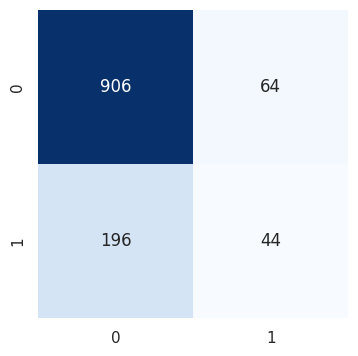

In [191]:
sns.set (rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)

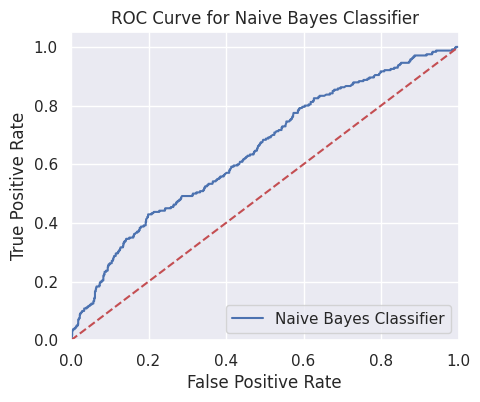

In [192]:
# Visualisation of the models's performance on an ROC/AUC curve
plt.figure(figsize=(5,4))
y_predictnb_proba = classifier.predict_proba(Tx_test)[:,1]
fpr, tpr, thresholds = roc_curve(Ty_test,  y_predictnb_proba)
nb_roc_auc2=roc_auc_score(Ty_test,classifier.predict(Tx_test))
plt.plot(fpr, tpr, label='Naive Bayes Classifier')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


### **Hyperparameter tuning with Naive Bayes Classifier**

In [ ]:
#parameters to be use in hypertunning process of the classifier

In [194]:
print(classifier.get_params().keys())

dict_keys(['priors', 'var_smoothing'])


In [198]:

# Create a parameter grid for alpha values for the naive Bayes classifier
param_grid_nb={
    "var_smoothing":np.logspace(0,-9, num =100)
}
grid_search_nb = GridSearchCV(classifier, param_grid_nb, scoring = 'accuracy', cv = 10, n_jobs=-1)
grid_search_nb.fit(Tx_train, Ty_train)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [199]:
# printing the accuracy score from hypertuned Naive Bayes' classifier
accuracy23=grid_search_nb.best_score_
accuracy23

0.8178242047807265

In [200]:
# printing the best hyperparameters for the accuracy score of hyper-tunned classifier
print(grid_search_nb.best_estimator_)

GaussianNB(var_smoothing=0.657933224657568)


## **Model Training with Random Forest Classifier**

In [114]:
# create the Random Forest Classifier and use the train dataset to train the model
classifier_rf = RandomForestClassifier(n_estimators = 100)
classifier_rf.fit(Tx_train, Ty_train)


RandomForestClassifier()

In [115]:
# predict the results of the model
y_predict_rf=classifier_rf.predict(Tx_test)
y_predict_probarf = classifier_rf.predict_proba(Tx_test)[:,1]

In [116]:
# Evaluating the model using classification report
print(classification_report(Ty_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       970
           1       0.27      0.18      0.22       240

    accuracy                           0.74      1210
   macro avg       0.54      0.53      0.53      1210
weighted avg       0.71      0.74      0.72      1210



In [117]:
# Evaluating the model's performance using a confusion matrix

In [118]:
cm_rf = confusion_matrix(Ty_test, y_predict_rf)
print(cm_rf)
rf_score = accuracy_score(Ty_test, y_predict_rf)

[[855 115]
 [197  43]]


In [119]:
rf_score

0.7421487603305785

<Axes: >

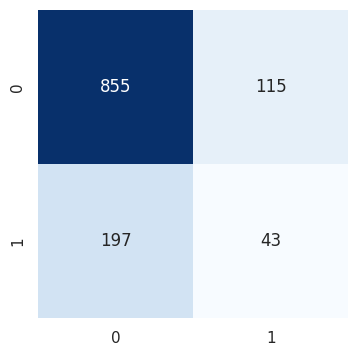

In [120]:
sns.set (rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)

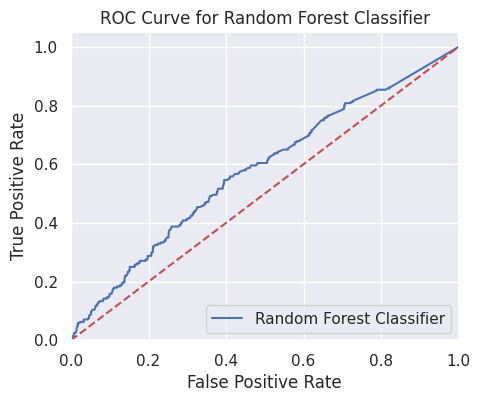

In [121]:
# Visualisation of the models's performance on an ROC/AUC curve
plt.figure(figsize=(5,4))
y_predictnb_proba = classifier_rf.predict_proba(Tx_test)[:,1]
fpr, tpr, thresholds = roc_curve(Ty_test, y_predict_probarf)
nb_roc_auc2=roc_auc_score(Ty_test,classifier_rf.predict(Tx_test))
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.title('ROC Curve for Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


## **Hyperparameter tunning the Random Forest classifier**

In [236]:
# lets specify the hyperparameters to be used in the Random Forest hypertunning
# number of trees in the random forest
n_estimators = [50, 100, 200]

In [237]:
# number of features to consider at every split
max_features = ['auto','sqrt','log2']
# number of levels in the tree
max_depth = [None, 10, 20, 30]

In [244]:
# number of samples required to split each node
mini_samples_split = [2, 5, 10]
# minimum number of samples required at each leaf node
mini_samples_leaf = [1, 2, 4]

In [243]:
# method of selecting samples for training each tree
criterion = ['gini', 'entropy']
bootstrap = [True, False]

In [257]:
param_grid_rf = {
    'n_estimators': [25, 50, 80],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [258]:
#lets use  GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(classifier_rf, param_grid_rf, cv=5)
grid_search_rf.fit(Tx_train, Ty_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 80]})

In [259]:
# print the best estimators for best score after hyper-parameter tuning the model
print(grid.best_estimator_)

SVC(C=1, gamma=1, probability=True, random_state=0)


In [260]:
# printing the accuracy score from hypertuned Random Forest classifier
accuracy18=grid.best_score_
accuracy18

0.8163770116317826

In [250]:
# lets incporate all these parameters into the parameter grid
param_grid_rf = {'n_estimators':n_estimators,
                  'max_features': max_features,
                  'max_depth':max_depth,
                  'mini_samples_split': mini_samples_split,
                  'mini_samples_leaf': mini_samples_leaf,
                  'bootstrap':bootstrap,
                  'criterion':criterion}
print (param_grid_rf)

{'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 10, 20, 30], 'mini_samples_split': [2, 5, 10], 'mini_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


## **Model building with K-nearest Neighbours Classifier**

In [122]:
# Create the K-nearest Neighbours Classifier and use the train dataset to train the model
classifier_knn = KNeighborsClassifier(n_neighbors=3)
classifier_knn.fit(Tx_train, Ty_train)

KNeighborsClassifier(n_neighbors=3)

In [123]:
# predict the results of the model
y_predictknn=classifier_knn.predict(Tx_test)
y_predict_probaknn = classifier_knn.predict_proba(Tx_test)[:,1]

In [124]:
# Evaluating the K-nearest Neighbours model using classification report
print(classification_report(Ty_test,y_predictknn))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       970
           1       0.26      0.14      0.18       240

    accuracy                           0.75      1210
   macro avg       0.53      0.52      0.52      1210
weighted avg       0.70      0.75      0.72      1210



In [125]:
# Evaluating the model's performance using a confusion matrix

In [126]:
cm_knn = confusion_matrix(Ty_test, y_predictknn)
print(cm_knn)
knn_score = accuracy_score(Ty_test, y_predictknn)

[[874  96]
 [207  33]]


In [127]:
knn_score

0.7495867768595041

In [128]:
Ty_test

array([1, 0, 0, ..., 0, 0, 0])

In [129]:
y_predictknn

array([1, 0, 0, ..., 0, 1, 0])

In [130]:
# visualisation of the classifier on a heat map

<Axes: >

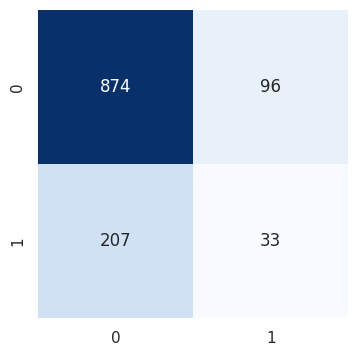

In [131]:
sns.set (rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)

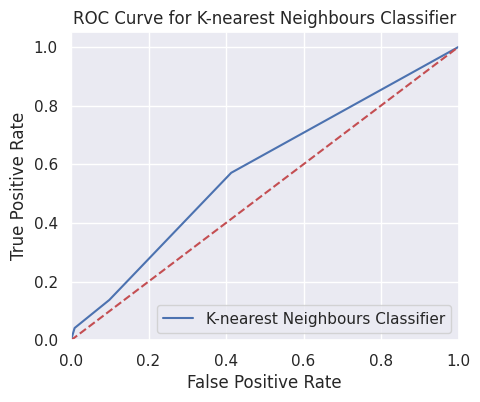

In [132]:
# Visualisation of the models's performance on an ROC/AUC curve
plt.figure(figsize=(5,4))
y_predictnb_proba = classifier_knn.predict_proba(Tx_test)[:,1]
fpr, tpr, thresholds = roc_curve(Ty_test, y_predict_probaknn)
nb_roc_auc2=roc_auc_score(Ty_test,classifier_rf.predict(Tx_test))
plt.plot(fpr, tpr, label='K-nearest Neighbours Classifier')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.title('ROC Curve for K-nearest Neighbours Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


## **hyperparametr tuninng for k-nearest Neighbours classifier**

In [261]:
# define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [266]:
# lets use  GridSearchCV to find the best hyperparameters
grid_search_knn = GridSearchCV(classifier_knn , param_grid_knn, cv=5)
grid_search_knn.fit(Tx_train, Ty_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [265]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [268]:
# printing the accuracy score from hypertuned Kneighbours classifier
accuracy17=grid.best_score_
accuracy17

0.8163770116317826

### **model building with linear regression**

In [133]:
# modeling using linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
model=linear_model.LinearRegression()
model.fit(Tx_train, Ty_train)
y_predict=model.predict(Tx_test)

**model prediction results**

In [134]:
# display of the coefficients, mean squared error and R^2

In [135]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean_Squared_Error(MSE): %.2f'% mean_squared_error (Ty_test, y_predict))
print('Coefficient of determination (R^2): %.2f'% r2_score(Ty_test, y_predict))

Coefficients: [ 0.02988964  0.008692    0.39388448 -0.19520333 -0.19520333  0.08431888
  0.03871097]
Intercept: 0.18569065343258864
Mean_Squared_Error(MSE): 0.15
Coefficient of determination (R^2): 0.04


### **model evaluation for Linear regression**

In [136]:
#score for linear regression model
y_predict=model.predict(Tx_test)
mae=mean_absolute_error(Ty_test, y_predict)
mae

0.29763364513308954

## **Model building with SVM classifier**

In [137]:
#Import svm model
from sklearn import svm

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a svm Classifier
support_vectorcf= svm.SVC(kernel='linear',probability=True,random_state = 0)
#Train the model using the training sets
support_vectorcf.fit(Tx_train, Ty_train)



SVC(kernel='linear', probability=True, random_state=0)

In [138]:
# predict the results of the model
y_predict_svm=support_vectorcf.predict(Tx_test)


In [139]:
# Evaluating the SVM model using classification report
print(classification_report(Ty_test,y_predict_svm))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       970
           1       0.00      0.00      0.00       240

    accuracy                           0.80      1210
   macro avg       0.40      0.50      0.44      1210
weighted avg       0.64      0.80      0.71      1210



In [140]:
# Evaluating the model's performance using a confusion matrix
cm_svm = confusion_matrix(Ty_test, y_predict_svm)
print(cm_svm)
accuracy_score(Ty_test, y_predict_svm)

[[970   0]
 [240   0]]


0.8016528925619835

In [141]:
# Accuracy score for SVM model

In [142]:
accuracy=accuracy_score(Ty_test, y_predict_svm)

In [143]:
# Accuracy score for SVM model
accuracy

0.8016528925619835

<Axes: >

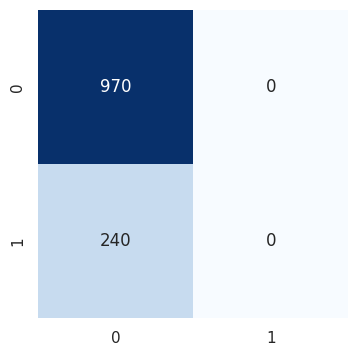

In [144]:
# visualisation of SVM model performance on a heat map
sns.set (rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [145]:
# predict the results of the model
y_predict_svm = support_vectorcf.predict_proba(Tx_test)[:, 1]

In [146]:
# Creating instances (i.e. objects) of the roc curve
fpr, tpr, thresholds = roc_curve(Ty_test, y_predict_svm)

In [147]:
roc_auc = auc(fpr, tpr)

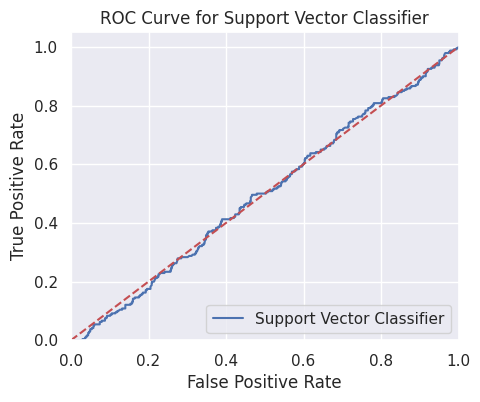

In [148]:
# Visualisation of the models's performance on an ROC/AUC curve
plt.figure(figsize=(5,4))
y_predictnb_proba = support_vectorcf.predict_proba(Tx_test)[:,1]
fpr, tpr, thresholds = roc_curve(Ty_test, y_predict_svm)
nb_roc_auc2=roc_auc_score(Ty_test,support_vectorcf.predict(Tx_test))
plt.plot(fpr, tpr, label='Support Vector Classifier')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.title('ROC Curve for Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [149]:
# make the predictions using SVM model


### **Hyperparameter tuning the SVM classifier**

In [150]:
# hyperparameter tunning with SVM classifier
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(support_vectorcf, param_grid, refit = True, verbose = 3)

In [151]:
# fitting the model for grid search
grid.fit(Tx_train, Ty_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.814 total time=   3.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.815 total time=   2.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.815 total time=   2.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.814 total time=   2.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.814 total time=   2.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   2.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   3.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   3.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   2.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   2.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.814 total time=   1.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(kernel='linear', probability=True, random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [152]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [153]:
# print the best estimators for best score after hyper-parameter tuning the model
print(grid.best_estimator_)

SVC(C=1, gamma=1, probability=True, random_state=0)


In [162]:
# printing the accuracy score from hypertuned SVM classifier
accuracy=grid.best_score_
accuracy

0.8163770116317826

**Making predictions using the test data set using SVM**<br>
**plus generating the csv file from the model predictions**

In [154]:
ds2_new.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,1,0,0,0,300.0,1,1960.0,2,3310
1,H11921,2016,0.997268,0,1,0,0,0,300.0,1,1960.0,2,3310
2,H9805,2013,0.369863,0,1,1,1,1,790.0,1,1960.0,9,3310
3,H7493,2014,1.000000,0,1,0,0,0,1405.0,1,2004.0,2,3321
4,H7494,2016,1.000000,0,1,0,0,0,1405.0,1,2004.0,2,3321


In [155]:
#Extracting out the important variables
feature_24=['Insured_Period','Residential','Building_Fenced','Garden','Settlement','Building Dimension','Building_Type']
predict_test=ds2_new[feature_24]
predict_test.head()

,Insured_Period,Residential,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type
0,1.000000,0,0,0,0,300.0,1
1,0.997268,0,0,0,0,300.0,1
2,0.369863,0,1,1,1,790.0,1
3,1.000000,0,0,0,0,1405.0,1
4,1.000000,0,0,0,0,1405.0,1


In [156]:
# scaling the test dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
predict_test = sc.fit_transform(predict_test)


In [157]:
# make predictions using the SVM model on the test dataset
predictions = support_vectorcf.predict(predict_test)

In [158]:
# create a new dataframe with the predictions
output_frame = pd.DataFrame({'predictions':predictions})

In [159]:
# Adding customer Id the output dataframe
customer_ids = ds2_new['Customer Id']
output_df = pd.DataFrame({'CustomerID': customer_ids,'predictions':predictions})
output_df
# print the predicted data frame
print(output_df)


     CustomerID  predictions
0        H11920            0
1        H11921            0
2         H9805            0
3         H7493            0
4         H7494            0
...         ...          ...
3063     H11582            0
3064     H11583            0
3065     H11720            0
3066     H11721            0
3068      H9021            0

[2641 rows x 2 columns]


In [160]:
# Save the predictions to a CSV file
output_df.to_csv('predictions_output.csv', index=False)
files.download('predictions_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [161]:
# comparing the performance of different models
models=pd.DataFrame({
    'models':['SVM','Linear Regression','K-nearest Neighbours','Naive Bayes','Random Forest'],
    'scores':[accuracy,mae,knn_score,nb_score,rf_score]})
models.sort_values(by='scores',ascending = False)

,models,scores
0,SVM,0.801653
3,Naive Bayes,0.785124
2,K-nearest Neighbours,0.749587
4,Random Forest,0.742149
1,Linear Regression,0.297634


so from the above table, SVM was the best model for my case with an accuracy score of 0.801